In [128]:
import pickle

import numpy as np
from matplotlib import pyplot as plt
from pandas import read_csv

In [129]:
print("Loading data...")
training_file = './Data/train.p'

sign_names = read_csv("./Data/signname.csv").values[:, 1]

with open(training_file, mode='rb') as f:
    train = pickle.load(f)
images_train, labels_train = train['features'], train['labels']

for i in range(len(labels_train)):
 
    # replace hardik with shardul
    if labels_train[i] < 9:
        labels_train[i] = 0
    elif labels_train[i] >= 9:
        labels_train[i] = 1

Loading data...


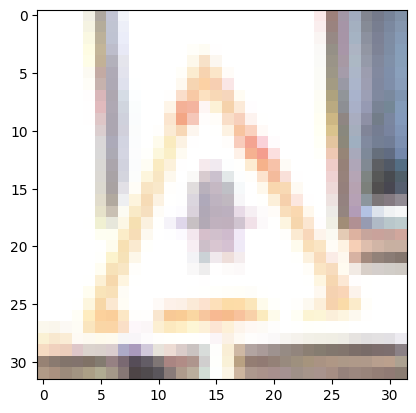

In [130]:
index = np.random.randint(0, len(images_train))
data = images_train[index, :, :, :]
plt.imshow(data)
plt.show()

In [131]:
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Flatten, Dense

# Assuming your image dimensions and channels
height = 32  # example height
width = 32   # example width
channels = 3  # RGB channels

# Build the model
model = Sequential([
    # The Flatten layer converts the 2D image data into a 1D array.
    Flatten(input_shape=(height, width, channels)),  # Flatten the input
    
    # Several Dense layers are used to learn from the flattened image data. The number of neurons and layers can be adjusted based on the complexity of your task.
    Dense(128, activation='relu'),  # First fully connected layer
    Dense(64, activation='relu'),   # Second fully connected layer
    
    # The final Dense layer with a single neuron and a sigmoid activation function is used for binary classification.
    Dense(1, activation='sigmoid')  # Output layer for binary classification
])

# Compile the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [132]:
validation_file = './Data/valid.p'

with open(validation_file, mode='rb') as f:
    valid = pickle.load(f)
images_valid, labels_valid = valid['features'], valid['labels']

for i in range(len(labels_valid)):
 
    # replace hardik with shardul
    if labels_valid[i] < 9:
        labels_valid[i] = 0
    elif labels_valid[i] >= 9:
        labels_valid[i] = 1

In [133]:
model.fit(images_train, labels_train, epochs=10, validation_data=(images_valid, labels_valid))

Epoch 1/10
1088/1088 [==============================] - 2s 2ms/step - loss: 2.1003 - accuracy: 0.8670 - val_loss: 0.1769 - val_accuracy: 0.9447
Epoch 2/10
1088/1088 [==============================] - 2s 2ms/step - loss: 0.2695 - accuracy: 0.9274 - val_loss: 0.5872 - val_accuracy: 0.8342
Epoch 3/10
1088/1088 [==============================] - 2s 2ms/step - loss: 0.2211 - accuracy: 0.9365 - val_loss: 0.2082 - val_accuracy: 0.9138
Epoch 4/10
1088/1088 [==============================] - 2s 2ms/step - loss: 0.1824 - accuracy: 0.9372 - val_loss: 0.1667 - val_accuracy: 0.9465
Epoch 5/10
1088/1088 [==============================] - 2s 2ms/step - loss: 0.2222 - accuracy: 0.9290 - val_loss: 0.1960 - val_accuracy: 0.9200
Epoch 6/10
1088/1088 [==============================] - 2s 2ms/step - loss: 0.2282 - accuracy: 0.9040 - val_loss: 0.2889 - val_accuracy: 0.9136
Epoch 7/10
1088/1088 [==============================] - 2s 2ms/step - loss: 0.2142 - accuracy: 0.9366 - val_loss: 0.1943 - val_accuracy:

In [134]:
test_file = './Data/test.p'

with open(test_file, mode='rb') as f:
    test = pickle.load(f)
images_test, labels_test = test['features'], test['labels']

for i in range(len(labels_test)):
 
    # replace hardik with shardul
    if labels_test[i] < 9:
        labels_test[i] = 0
    elif labels_test[i] >= 9:
        labels_test[i] = 1

In [135]:
test_loss, test_accuracy = model.evaluate(images_test, labels_test)

395/395 [==============================] - 0s 753us/step - loss: 0.1589 - accuracy: 0.9452
